<a id="1"></a>
<h1 style="color:Black; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">PREDICTING HOTEL BOOKINGS CANCELLATION</h1>

This notebook is a continuation of the previous notebook of Data Cleaning and EDA

<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">1. Library and Data</h1>

In [1]:
# Import library
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from sklearn.feature_selection import SelectPercentile, RFE

import statsmodels.api as sm #stats summary, simple model
from statsmodels.api import OLS #Ordinary LS
from statsmodels.stats.outliers_influence import variance_inflation_factor #multicol

from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,\
plot_confusion_matrix, precision_recall_curve, plot_precision_recall_curve, confusion_matrix, roc_curve, plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100

In [2]:
df_modeling = pd.read_csv('df_for_modeling.csv')
df_modeling = df_modeling.drop(columns=['Unnamed: 0'])
df_modeling

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,countries
0,Resort Hotel,0,342,July,1,0,0,BB,Direct,0,0,0,C,3,NaN,0,Transient,0.00,0,0,2.0,PRT
1,Resort Hotel,0,737,July,1,0,0,BB,Direct,0,0,0,C,4,NaN,0,Transient,0.00,0,0,2.0,PRT
2,Resort Hotel,0,7,July,1,0,1,BB,Direct,0,0,0,C,0,NaN,0,Transient,75.00,0,0,1.0,GBR
3,Resort Hotel,0,13,July,1,0,1,BB,Corporate,0,0,0,A,0,304.0,0,Transient,75.00,0,0,1.0,GBR
4,Resort Hotel,0,14,July,1,0,2,BB,TA/TO,0,0,0,A,0,240.0,0,Transient,98.00,0,1,2.0,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118892,City Hotel,0,23,August,30,2,5,BB,TA/TO,0,0,0,A,0,394.0,0,Transient,96.14,0,0,2.0,BEL
118893,City Hotel,0,102,August,31,2,5,BB,TA/TO,0,0,0,E,0,9.0,0,Transient,225.43,0,2,3.0,FRA
118894,City Hotel,0,34,August,31,2,5,BB,TA/TO,0,0,0,D,0,9.0,0,Transient,157.71,0,4,2.0,DEU
118895,City Hotel,0,109,August,31,2,5,BB,TA/TO,0,0,0,A,0,89.0,0,Transient,104.40,0,0,2.0,GBR


In [3]:
def report(df_modeling):
    col = []
    d_type = []
    uniques = []
    n_uniques = []
    
    for i in df_modeling .columns:
        col.append(i)
        d_type.append(df_modeling [i].dtypes)
        uniques.append(df_modeling [i].unique()[:5])
        n_uniques.append(df_modeling [i].nunique())
    
    return pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_sample': uniques, 'n_uniques': n_uniques})

report(df_modeling)

,Column,d_type,unique_sample,n_uniques
0,hotel,object,"[Resort Hotel, City Hotel]",2
1,is_canceled,int64,"[0, 1]",2
2,lead_time,int64,"[342, 737, 7, 13, 14]",479
3,arrival_date_month,object,"[July, August, September, October, November]",12
4,arrival_date_day_of_month,int64,"[1, 2, 3, 4, 5]",31
5,stays_in_weekend_nights,int64,"[0, 1, 2, 4, 3]",15
6,stays_in_week_nights,int64,"[0, 1, 2, 3, 4]",33
7,meal,object,"[BB, FB, HB, SC, Undefined]",5
8,distribution_channel,object,"[Direct, Corporate, TA/TO, GDS]",4
9,is_repeated_guest,int64,"[0, 1]",2


<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">2. Modeling</h1>

## 2.1 Splitting

In [4]:
X = df_modeling.drop(columns = ['is_canceled'])
y = df_modeling['is_canceled']
X.head()

,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,countries
0,Resort Hotel,342,July,1,0,0,BB,Direct,0,0,0,C,3,NaN,0,Transient,0.0,0,0,2.0,PRT
1,Resort Hotel,737,July,1,0,0,BB,Direct,0,0,0,C,4,NaN,0,Transient,0.0,0,0,2.0,PRT
2,Resort Hotel,7,July,1,0,1,BB,Direct,0,0,0,C,0,NaN,0,Transient,75.0,0,0,1.0,GBR
3,Resort Hotel,13,July,1,0,1,BB,Corporate,0,0,0,A,0,304.0,0,Transient,75.0,0,0,1.0,GBR
4,Resort Hotel,14,July,1,0,2,BB,TA/TO,0,0,0,A,0,240.0,0,Transient,98.0,0,1,2.0,GBR


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 2020)

## 2.2 Pipeline

In [6]:
smote = SMOTE()

In [7]:
df_modeling.select_dtypes(include=['int64','float64']).columns.to_list()

['is_canceled',
 'lead_time',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'total_guests']

In [8]:
df_modeling.select_dtypes(include=['object']).columns.to_list()

['hotel',
 'arrival_date_month',
 'meal',
 'distribution_channel',
 'assigned_room_type',
 'customer_type',
 'countries']

In [9]:
# Split numerical and categorical data
num = ['lead_time','arrival_date_day_of_month','stays_in_weekend_nights', 'stays_in_week_nights','previous_cancellations','previous_bookings_not_canceled', 'booking_changes','days_in_waiting_list', 'adr', 'required_car_parking_spaces','total_of_special_requests','total_guests']
cat = ['hotel','arrival_date_month','meal','distribution_channel','is_repeated_guest','assigned_room_type','agent','customer_type','countries']

# Make pipeline for categorical features
cat_scalerencoder_pipe = Pipeline([
    ('imputer',SimpleImputer(strategy = 'constant',fill_value = 0)),
    ('binary encoder',ce.BinaryEncoder())
])

# Make pipeline for numerical features
num_scaler_pipe = Pipeline([
    ('robust scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('cat pipe', cat_scalerencoder_pipe,cat),
    ('num pipe', num_scaler_pipe,num)], 
    remainder = 'passthrough')

> ## 2.3 Modeling with Default Parameters

> ### 2.3.1 Model assignment

In [10]:
# Model assignment
logreg = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()
xgbc = XGBClassifier()
knn = KNeighborsClassifier()

models = [logreg, dtc, rfc, gbc, xgbc, knn]
model_name = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 
              'XGBClassifier','KNeighborsClassifier']

In [11]:
# Combine all pipeline. Assign in to a list
all_models = []
for i in models:
    modelpipe = Pipeline([
        ('transformer', transformer),
        ('resampling', smote),
        ('clf',i)])
    all_models.append(modelpipe)

> ### 2.3.2 Cross Validation

I am going to use __PRECISION SCORE__ as evaluation metrics because I want the FP as less as possible.

1. FN is a condition when the __MODEL__ predict THE GUESTS ARE COMING __(0)__ but __ACTUALLY__ THE BOOKINGS ARE CANCELLED __(1)__
    - High numbers of FN will cause __unoptimal revenue__ due to many rooms are reserved (and can not be booked by other potential guests) but the booking is cancelled


2. FP is a condition when the __MODEL__ predict THE BOOKINGS ARE CANCELLED __(1)__ but __ACTUALLY__ THE GUESTS ARE COMING __(0)__
    - High numbers of FP will cause __overbooking__.
        -  overbooking can force the hotel to deny service to a customer; this can be a very bad experience for the guests and may result in online __complaints and generation of a negative impact in terms of social reputation__ 
        - the hotel also __lose future revenue__ from this overbooking, since the guests who experienced bad service have strong tendency to avoid that hotel. In other words, 
        - overbooking also cause the loss that occurs as a result of the hotel’s obligation to compensate the customer, including reallocation costs

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Hotel Lobby" style="width:690px;height:345px;">

In [13]:
# Cross validation
skfold = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)

logit_score = cross_val_score(all_models[0], X_train, y_train, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
dtc_score = cross_val_score(all_models[1], X_train, y_train, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(all_models[2], X_train, y_train, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(all_models[3], X_train, y_train, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
xgbc_score = cross_val_score(all_models[4], X_train, y_train, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
knn_score = cross_val_score(all_models[5], X_train, y_train, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  6.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  4.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.9min finished


In [14]:
# Cross validation score
crosval_results = [logit_score,dtc_score,rfc_score,gbc_score,xgbc_score,knn_score]
pd.DataFrame(crosval_results, index=model_name)

,0,1,2,3,4
LogisticRegression,0.690097,0.681065,0.671240,0.688424,0.664042
DecisionTreeClassifier,0.773113,0.759415,0.766825,0.775322,0.777518
RandomForestClassifier,0.864640,0.858664,0.855933,0.866180,0.867910
GradientBoostingClassifier,0.773455,0.762015,0.751304,0.764538,0.758026
XGBClassifier,0.826940,0.821479,0.824945,0.837142,0.827686
KNeighborsClassifier,0.705813,0.696998,0.701163,0.702687,0.689055


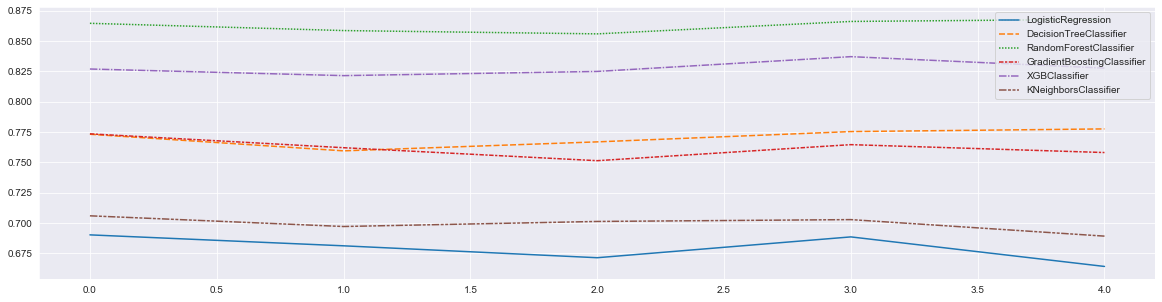

In [16]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
sns.lineplot(data=pd.DataFrame(crosval_results, index=model_name).T)
plt.show()

In [17]:
# Cross validation score mean and std
crosval_results_mean = [logit_score.mean(),dtc_score.mean(),rfc_score.mean(),gbc_score.mean(),xgbc_score.mean(),knn_score.mean()]
crosval_results_std = [logit_score.std(),dtc_score.std(),rfc_score.std(),gbc_score.std(),xgbc_score.std(),knn_score.std()]
pd.DataFrame({'score_mean':crosval_results_mean, 'score_std':crosval_results_std}, index=model_name)

,score_mean,score_std
LogisticRegression,0.678973,0.010002
DecisionTreeClassifier,0.770438,0.006568
RandomForestClassifier,0.862666,0.004585
GradientBoostingClassifier,0.761868,0.007318
XGBClassifier,0.827638,0.005215
KNeighborsClassifier,0.699143,0.005788


It can be said that all the models are stable. Now let's check the training and test precision accuracy

> ### 2.3.3 Fit & Evaluation

In [18]:
# Fit and predict
tr_score = []
ts_score = []
default_models = []

skf = StratifiedKFold(random_state=2021, shuffle=True)

for train_index, test_index in skf.split(X_train, y_train):
    for i in all_models:
        each_models = i.fit(X_train, y_train)
        default_models.append(each_models)
        tr_score.append(precision_score(y_train, each_models.predict(X_train)))
        ts_score.append(precision_score(y_test, each_models.predict(X_test)))

[16:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:48:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [19]:
# Summary of train and test score
train_score_logreg = tr_score[0::6]
train_score_dtc = tr_score[1::6]
train_score_rfc = tr_score[2::6]
train_score_gbc = tr_score[3::6]
train_score_xgbc = tr_score[4::6]
train_score_knn = tr_score[5::6]

test_score_logreg = ts_score[0::6]
test_score_dtc = ts_score[1::6]
test_score_rfc = ts_score[2::6]
test_score_gbc = ts_score[3::6]
test_score_xgbc = ts_score[4::6]
test_score_knn = ts_score[5::6]

train_vs_test = pd.DataFrame({'train_score_logreg':train_score_logreg,
              'test_score_logreg':test_score_logreg,
              'train_score_dtc':train_score_dtc,
              'test_score_dtc':test_score_dtc,
              'train_score_rfc':train_score_rfc,
              'test_score_rfc':test_score_rfc,
              'train_score_gbc':train_score_gbc,
              'test_score_gbc':test_score_gbc,
              'train_score_xgbc':train_score_xgbc,
              'test_score_xgbc':test_score_xgbc,
              'train_score_knn':train_score_knn,
              'test_score_knn':test_score_knn
             })
train_vs_test

,train_score_logreg,test_score_logreg,train_score_dtc,test_score_dtc,train_score_rfc,test_score_rfc,train_score_gbc,test_score_gbc,train_score_xgbc,test_score_xgbc,train_score_knn,test_score_knn
0,0.685015,0.678347,0.995405,0.773898,0.993780,0.870733,0.761601,0.760858,0.846248,0.825224,0.793127,0.709966
1,0.687033,0.679454,0.995518,0.772835,0.993612,0.868966,0.762525,0.761746,0.847151,0.827530,0.792519,0.711793
2,0.684642,0.678288,0.994984,0.780146,0.993220,0.868290,0.764849,0.761293,0.847852,0.827201,0.792524,0.709970
3,0.685968,0.678849,0.994871,0.777790,0.994171,0.869270,0.760653,0.756777,0.847842,0.825931,0.793208,0.711817
4,0.684154,0.677038,0.994955,0.777088,0.993864,0.870918,0.761797,0.760375,0.845813,0.827342,0.790690,0.708369


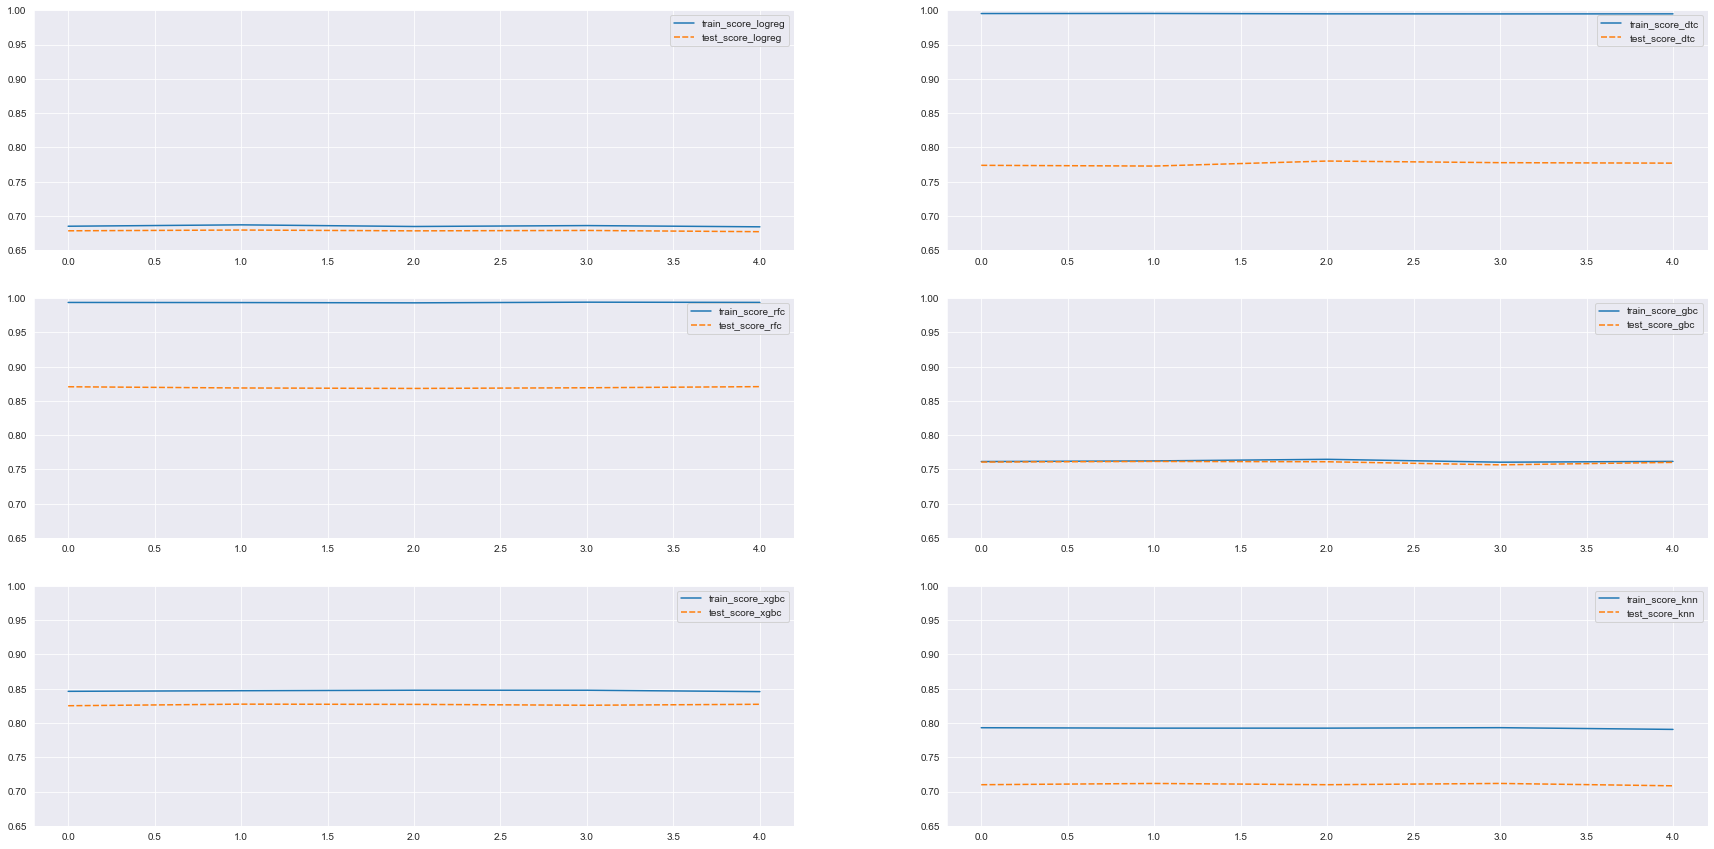

In [20]:
# Plot the score of each models
plt.figure(figsize=(30,15))

plt.subplot(321)
plt.ylim(0.65, 1)
sns.lineplot(data=train_vs_test[['train_score_logreg','test_score_logreg']])

plt.subplot(322)
plt.ylim(0.65, 1)
sns.lineplot(data=train_vs_test[['train_score_dtc','test_score_dtc']])

plt.subplot(323)
plt.ylim(0.65, 1)
sns.lineplot(data=train_vs_test[['train_score_rfc','test_score_rfc']])

plt.subplot(324)
plt.ylim(0.65, 1)
sns.lineplot(data=train_vs_test[['train_score_gbc','test_score_gbc']])

plt.subplot(325)
plt.ylim(0.65, 1)
sns.lineplot(data=train_vs_test[['train_score_xgbc','test_score_xgbc']])

plt.subplot(326)
plt.ylim(0.65, 1)
sns.lineplot(data=train_vs_test[['train_score_knn','test_score_knn']])


plt.show()

In [21]:
# Average score of each models
avg_train_score_logreg = sum(train_score_logreg)/len(train_score_logreg)
avg_test_score_logreg = sum(test_score_logreg)/len(test_score_logreg)
avg_train_score_dtc = sum(train_score_dtc)/len(train_score_dtc)
avg_test_score_dtc = sum(test_score_dtc)/len(test_score_dtc)
avg_train_score_rfc = sum(train_score_rfc)/len(train_score_rfc)
avg_test_score_rfc = sum(test_score_rfc)/len(test_score_rfc)
avg_train_score_gbc = sum(train_score_gbc)/len(train_score_gbc)
avg_test_score_gbc = sum(test_score_gbc)/len(test_score_gbc)
avg_train_score_xgbc = sum(train_score_xgbc)/len(train_score_xgbc)
avg_test_score_xgbc = sum(test_score_xgbc)/len(test_score_xgbc)
avg_train_score_knn = sum(train_score_knn)/len(train_score_knn)
avg_test_score_knn = sum(test_score_knn)/len(test_score_knn)

trainScore = [avg_train_score_logreg,avg_train_score_dtc, avg_train_score_rfc, avg_train_score_gbc, avg_train_score_xgbc, avg_train_score_knn]
testScore = [avg_test_score_logreg, avg_test_score_dtc, avg_test_score_rfc, avg_test_score_gbc, avg_test_score_xgbc, avg_test_score_knn]

In [22]:
# Summary of average score
avg_train_vs_test = pd.DataFrame({'trainScore':trainScore,
                                  'testScore':testScore},
                                 index = model_name
                            )

avg_train_vs_test['difference'] = avg_train_vs_test['trainScore']-avg_train_vs_test['testScore']
avg_train_vs_test

,trainScore,testScore,difference
LogisticRegression,0.685362,0.678395,0.006967
DecisionTreeClassifier,0.995147,0.776351,0.218795
RandomForestClassifier,0.993729,0.869635,0.124094
GradientBoostingClassifier,0.762285,0.760210,0.002075
XGBClassifier,0.846981,0.826645,0.020336
KNeighborsClassifier,0.792414,0.710383,0.082031


From the table and graphic above, we can see that: 
- the highest precision occured in Random Forest Classifier (87.9%) followed by Extra Gradient Boosting Classifier (84.1%)
- the highest precision occured in Decision Tree Classifier (99.5%) followed by Random Forest Classifier (99.4%)
- DTC model has the highest difference between train and test score. Although the train score of DTC model is the highest, it can't predict the test data well. It can be said that Decision Tree Classifier has a tendency to overfit and not to generalize well for future bookings

Now, I will choose 2 models to be treated with another strategy, which is Feature Selection using Recursive Feature Elemination (RFE). Considering the train and test score as well as the overfit indication, I decide to choose __Random Forest Classifier and Extra Gradient Boosting Classifier__.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, default_models[4].predict(X_test))
thresholds

In [ ]:
rc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'threshold': thresholds})
rc_df

In [ ]:
plot_roc_curve(default_models[3], X_test, y_test)
plt.show()

> ## 2.4 Modeling with Default Parameters + RFE

> ### 2.4.1 RFE assignment in Pipeline

In [89]:
from sklearn.feature_selection import SelectPercentile, RFE
# Combine all pipeline. Assign in to a list
all_models_rfe = []
for i in models:
    modelpipe_rfe = Pipeline([
        ('transformer', transformer),
        ('resampling', smote),
        ('rfe', RFE(rfc)),
        ('clf',i)])
    all_models_rfe.append(modelpipe_rfe)

> ### 2.4.2 Cross Validation

In [91]:
skfold = StratifiedKFold(n_splits=5, random_state=2021, shuffle=True)

# logit_score_rfe = cross_val_score(all_models_rfe[0], X_train_, y_train_, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
# dtc_score_rfe = cross_val_score(all_models_rfe[1], X_train_, y_train_, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
rfc_score_rfe = cross_val_score(all_models_rfe[2], X_train_, y_train_, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
# gbc_score_rfe = cross_val_score(all_models_rfe[3], X_train_, y_train_, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
xgbc_score_rfe = cross_val_score(all_models_rfe[4], X_train_, y_train_, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)
# knn_score_rfe = cross_val_score(all_models_rfe[5], X_train_, y_train_, scoring='precision', cv=skfold, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 19.2min finished


In [92]:
# Cross validation score
crosval_results_rfe = [rfc_score_rfe, xgbc_score_rfe]
pd.DataFrame(crosval_results_rfe, index=[model_name[2], model_name[4]])

,0,1,2,3,4
RandomForestClassifier,0.854910,0.846154,0.845984,0.862979,0.853448
XGBClassifier,0.820394,0.817038,0.823151,0.827652,0.821684


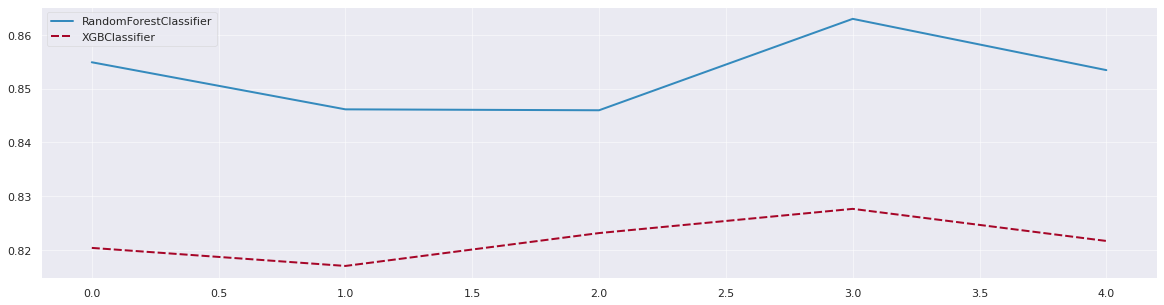

In [93]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
sns.lineplot(data=pd.DataFrame(crosval_results_rfe, index=[model_name[2], model_name[4]]).T)
plt.show()

In [96]:
# Cross validation score mean and std
crosval_results_mean_rfe = [rfc_score_rfe.mean(),xgbc_score_rfe.mean()]
crosval_results_std_rfe = [rfc_score_rfe.std(),xgbc_score_rfe.std()]
pd.DataFrame({'score_mean_rfe':crosval_results_mean_rfe, 'score_std_rfe':crosval_results_std_rfe}, index=[model_name[2], model_name[4]])

,score_mean_rfe,score_std_rfe
RandomForestClassifier,0.852695,0.00631
XGBClassifier,0.821984,0.00348


> ### 2.4.3 Fit & Evaluation

In [97]:
# Fit and predict
tr_score_rfe = []
ts_score_rfe = []
default_models_rfe = []

skf = StratifiedKFold(random_state=2020, shuffle=True)

for train_index_rfe, test_index_rfe in skf.split(X_train_, y_train_):
    for i in [all_models_rfe[2], all_models_rfe[4]]:
        each_models_rfe = i.fit(X_train_, y_train_)
        default_models_rfe.append(each_models_rfe)
        tr_score_rfe.append(precision_score(y_train_, each_models_rfe.predict(X_train_)))
        ts_score_rfe.append(precision_score(y_test_, each_models_rfe.predict(X_test_)))

[12:22:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:39:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:57:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:14:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [98]:
# Summary of train and test score
train_score_rfc_rfe = tr_score_rfe[0::2]
train_score_xgbc_rfe = tr_score_rfe[1::2]

test_score_rfc_rfe = ts_score_rfe[0::2]
test_score_xgbc_rfe = ts_score_rfe[1::2]

train_vs_test_rfe = pd.DataFrame({'train_score_rfc_rfe':train_score_rfc_rfe,
              'test_score_rfc_rfe':test_score_rfc_rfe,
              'train_score_xgbc_rfe':train_score_xgbc_rfe,
              'test_score_xgbc_rfe':test_score_xgbc_rfe,
             })
train_vs_test_rfe

,train_score_rfc_rfe,test_score_rfc_rfe,train_score_xgbc_rfe,test_score_xgbc_rfe
0,0.993215,0.857833,0.836626,0.815181
1,0.993523,0.855976,0.838623,0.812226
2,0.993522,0.855762,0.837203,0.813814
3,0.993690,0.856416,0.838453,0.817421
4,0.993718,0.857650,0.837878,0.813776


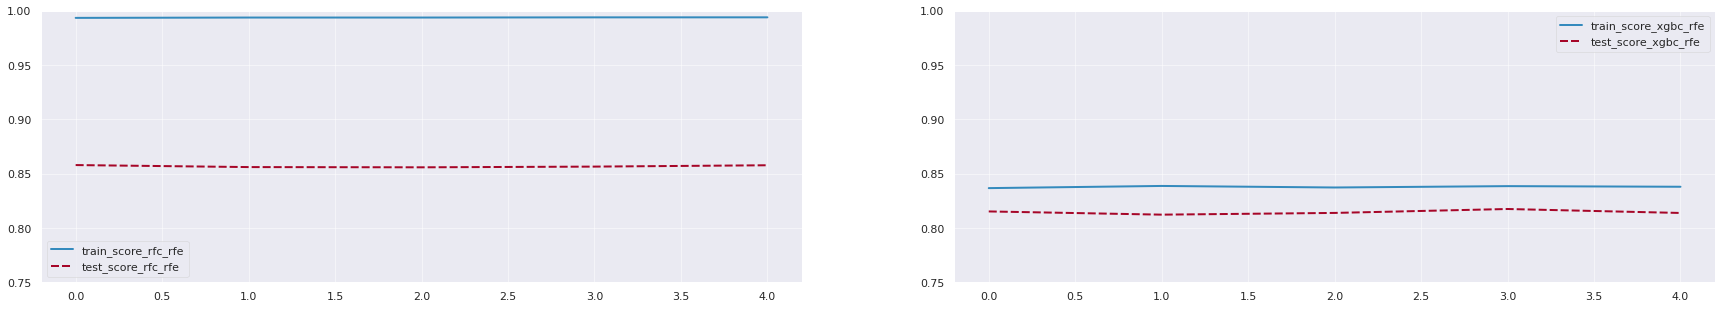

In [99]:
# Plot the score of each models
plt.figure(figsize=(30,5))

plt.subplot(121)
plt.ylim(0.75, 1)
sns.lineplot(data=train_vs_test_rfe[['train_score_rfc_rfe','test_score_rfc_rfe']])

plt.subplot(122)
plt.ylim(0.75, 1)
sns.lineplot(data=train_vs_test_rfe[['train_score_xgbc_rfe','test_score_xgbc_rfe']])

plt.show()

In [100]:
# Average score of each models
avg_train_score_rfc_rfe = sum(train_score_rfc_rfe)/len(train_score_rfc_rfe)
avg_test_score_rfc_rfe = sum(test_score_rfc_rfe)/len(test_score_rfc_rfe)
avg_train_score_xgbc_rfe = sum(train_score_xgbc_rfe)/len(train_score_xgbc_rfe)
avg_test_score_xgbc_rfe = sum(test_score_xgbc_rfe)/len(test_score_xgbc_rfe)

trainScore_rfe = [avg_train_score_rfc_rfe, avg_train_score_xgbc_rfe]
testScore_rfe = [avg_test_score_rfc_rfe, avg_test_score_xgbc_rfe]

In [101]:
# Summary of average score
avg_train_vs_test_rfe = pd.DataFrame({'trainScore_rfe':trainScore_rfe,
                                  'testScore_rfe':testScore_rfe},
                                 index = ['RFC RFE','XGBoost RFE']
                            )

avg_train_vs_test_rfe['difference_rfe'] = avg_train_vs_test_rfe['trainScore_rfe']-avg_train_vs_test_rfe['testScore_rfe']
avg_train_vs_test_rfe

,trainScore_rfe,testScore_rfe,difference_rfe
RFC RFE,0.993533,0.856728,0.136806
XGBoost RFE,0.837756,0.814483,0.023273


In [102]:
testScore2BestModel = []
testScore2BestModel.append(avg_train_vs_test['testScore'].iloc[2])
testScore2BestModel.append(avg_train_vs_test['testScore'].iloc[4])
testScore2BestModel

# Test score comparison with and without RFE
with_vs_withoutRFE = pd.DataFrame({'Without RFE':testScore2BestModel,
                                  'WITH RFE':testScore_rfe},
                                 index = [model_name[2], model_name[4]]
                            )
with_vs_withoutRFE

,Without RFE,WITH RFE
RandomForestClassifier,0.868334,0.856728
XGBClassifier,0.825698,0.814483


The test score is slighty drop from the non-RFE model. This RFE model use default total of best features used (n_features_to_select) which is half of the total features. The score drop indicates that the total of best features used is less than the optimal amount.

In [103]:
features = list(default_models_rfe[1].named_steps['transformer'].transformers_[0][1][1].get_feature_names()) + list(default_models_rfe[1].named_steps['transformer'].transformers_[1][2])

In [104]:
rfe_df = pd.DataFrame({'indicator':default_models_rfe[2].named_steps['rfe'].support_, 'features':features})
len(rfe_df[rfe_df['indicator']==True])

25

> ## 2.6 Hyperparameter Tuning

In [82]:
hyperparam_rfc = {'clf__n_estimators': [100, 200, 300, 400],
                  "clf__min_samples_split":  [2, 5, 10],
                  "clf__min_samples_leaf": [1, 2, 5]
                    }

In [80]:
# Init signature:
# RandomForestClassifier(
#     n_estimators=100,
#     *,
#     criterion='gini',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,
#     random_state=None,
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
#     ccp_alpha=0.0,
#     max_samples=None,
# )

In [83]:
skf = StratifiedKFold(n_splits=5)

rfc_grid = GridSearchCV(all_models[2], param_grid=hyperparam_rfc, scoring='precision', cv=skf, verbose=1, n_jobs=-1)
rfc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat '
                                                                         'pipe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=0,
                                                                                                        strategy='constant')),
                                                                                         ('binary '
                                                                                          'encoder',
                                                                           

In [84]:
rfc_grid.best_params_

{'clf__min_samples_leaf': 1,
 'clf__min_samples_split': 2,
 'clf__n_estimators': 400}

In [85]:
y_pred_rfc_tuned = rfc_grid.predict(X_test)
precision_score(y_test, y_pred_rfc_tuned)

0.8691677549566663

In [88]:
pd.DataFrame(rfc_grid.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__min_samples_leaf,param_clf__min_samples_split,param_clf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,134.696910,3.571837,4.084699,0.167913,1,2,400,"{'clf__min_samples_leaf': 1, 'clf__min_samples...",0.862350,0.867922,0.863482,0.869194,0.863643,0.865318,0.002712,1
7,130.142169,9.296985,4.160961,0.335608,1,5,400,"{'clf__min_samples_leaf': 1, 'clf__min_samples...",0.859359,0.865654,0.868512,0.869578,0.859203,0.864461,0.004420,2
1,87.216066,1.582567,2.274998,0.100561,1,2,200,"{'clf__min_samples_leaf': 1, 'clf__min_samples...",0.860992,0.867532,0.862760,0.867944,0.862791,0.864404,0.002802,3
5,73.862124,2.647118,1.952686,0.050752,1,5,200,"{'clf__min_samples_leaf': 1, 'clf__min_samples...",0.859698,0.868520,0.863839,0.867627,0.861160,0.864169,0.003465,4
2,113.740551,4.373047,3.314701,0.197638,1,2,300,"{'clf__min_samples_leaf': 1, 'clf__min_samples...",0.859463,0.867474,0.862487,0.868875,0.861369,0.863933,0.003622,5


In [91]:
print(f'Score Before Tuning: {testScore[2]}')
print(f'Score After Tuning: {precision_score(y_test, y_pred_rfc_tuned)}')

Score Before Tuning: 0.8696041179668971
Score After Tuning: 0.8691677549566663


> ## 2.7 Threshold Adjustment

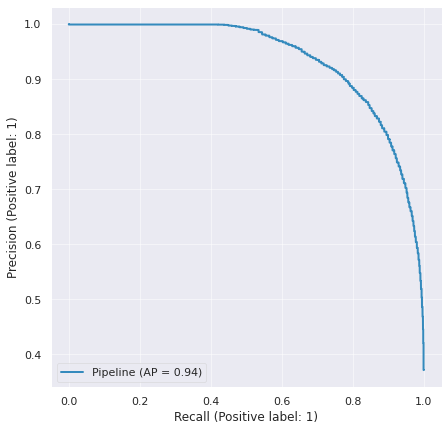

In [99]:
plot_precision_recall_curve(default_models[2], X_test, y_test)
plt.show()

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.


1. FN is a condition when the __MODEL__ predict THE GUESTS ARE COMING __(0)__ but __ACTUALLY__ THE BOOKINGS ARE CANCELLED __(1)__
    - High numbers of FN will cause __unoptimal revenue__ due to many rooms are reserved (and can not be booked by other potential guests) but the booking is cancelled


2. FP is a condition when the __MODEL__ predict THE BOOKINGS ARE CANCELLED __(1)__ but __ACTUALLY__ THE GUESTS ARE COMING __(0)__
    - High numbers of FP will cause __overbooking__.
        -  overbooking can force the hotel to deny service to a customer; this can be a very bad experience for the guests and may result in online __complaints and generation of a negative impact in terms of social reputation__ 
        - the hotel also __lose future revenue__ from this overbooking, since the guests who experienced bad service have strong tendency to avoid that hotel. In other words, 
        - overbooking also cause the loss that occurs as a result of the hotel’s obligation to compensate the customer, including reallocation costs


<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Hotel Lobby" style="width:690px;height:345px;">

As I write before, I will focus more to precision score because I want the FP as less as possible. We know that there will be a trade-off in adjusting thresholds. Hence, I will choose a thresholds that will improve precision score without reducing recall score too much.

In [110]:
y_scores = default_models[2].predict_proba(X_test)[:, 1]
p, r, thresholds = precision_recall_curve(y_test, y_scores)
thresholds

array([0.        , 0.00125   , 0.00166667, ..., 0.9965    , 0.9975    ,
       1.        ])

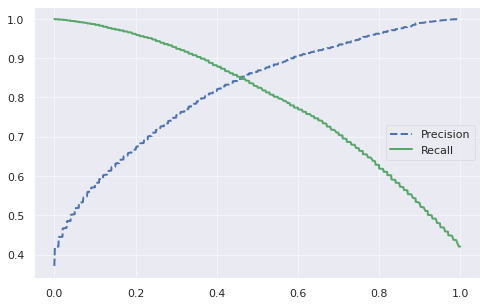

In [111]:
def plot_precision_recall_vs_threshold(p, r, thresholds): 
    fig = plt.figure(figsize= (8,5))
    plt.plot(thresholds, p[:-1], "b--", label="Precision")
    plt.plot(thresholds, r[:-1], "g-", label="Recall")
    plt.legend()

plot_precision_recall_vs_threshold(p, r, thresholds)

In [106]:
print(len(p))
print(len(r))
print(len(thresholds))

1217
1217
1216


According to [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html), __the last precision and the recall value should be ignored since the last precision and recall values are always 1. and 0. respectively and do not have a corresponding threshold__. This ensures that the graph starts on the y axis. That is why the dimension of threshold different with precision and recall. I will remove the last value of precision and recall array.

In [121]:
thresholds_ = thresholds.tolist()
p_ = p.tolist()
r_ = r.tolist()
del p_[1216]
del r_[1216]

print(len(p_))
print(len(r_))
print(len(thresholds))

1216
1216
1216


In [131]:
pr_df = pd.DataFrame({'precision': p_, 'recall': r_, 'threshold': thresholds_})
# pr_df
# 
pr_df[pr_df['threshold']==0.5]

,precision,recall,threshold
820,0.865012,0.828672,0.5


In [167]:
pr_df[pr_df['precision']>0.89].sort_values('recall', ascending=False).head(20)

,precision,recall,threshold
879,0.891113,0.791417,0.565167
882,0.891540,0.791190,0.569048
880,0.891085,0.791190,0.565556
881,0.891199,0.791190,0.565810
884,0.891640,0.791077,0.569810
885,0.891754,0.791077,0.570000
883,0.891526,0.791077,0.569405
886,0.894879,0.787567,0.572511
887,0.894866,0.787453,0.573333
888,0.894852,0.787340,0.574000


In [168]:
pr_df[pr_df['precision']>0.9].sort_values('recall', ascending=False).head(20)

,precision,recall,threshold
908,0.903435,0.774431,0.590690
909,0.903422,0.774318,0.591667
910,0.903409,0.774205,0.591667
911,0.903528,0.774205,0.592000
912,0.903516,0.774091,0.592500
913,0.903635,0.774091,0.593068
914,0.903755,0.774091,0.593333
915,0.903874,0.774091,0.596667
916,0.903994,0.774091,0.598667
917,0.904113,0.774091,0.600000


In [142]:
from numpy import argmax

# convert to f score
fscore = (2 * p * r) / (p + r)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.471667, F-Score=0.851


In [152]:
# Precision and recall score for the best fscore
pr_df[pr_df['threshold']>=0.47]
pr_df.iloc[791]

precision    0.858230
recall       0.843166
threshold    0.471667
Name: 791, dtype: float64

I decide to choose 0.572511 as the new threshold due to improvement of precision score about 3% and not siginificant reduction of recall (4%) 

In [158]:
# Best threshold -> 0.572511
pr_df.iloc[886]

precision    0.894879
recall       0.787567
threshold    0.572511
Name: 886, dtype: float64

In [173]:
# Comparison between best threshold with default threshold (0.5)
pr_df.iloc[[886, 820]]

,precision,recall,threshold
886,0.894879,0.787567,0.572511
820,0.865012,0.828672,0.500000


In [172]:
print(f'Precision score improvement: {(0.894879-0.865012)*100}')
print(f'Recall score reduction: {(0.828672-0.787567)*100}')

Precision score improvement: 2.9866999999999977
Recall score reduction: 4.110499999999995


In [161]:
# Classification report comparison
new_thr = 0.572511
y_pred = default_models[2].predict(X_test) # threshold 0.5
y_pred025 = [1 if i > new_thr else 0 for i in default_models[2].predict_proba(X_test)[:,1]] # threshold 0.254902

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred025))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     14949
           1       0.87      0.82      0.85      8831

    accuracy                           0.89     23780
   macro avg       0.88      0.88      0.88     23780
weighted avg       0.89      0.89      0.89     23780

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     14949
           1       0.89      0.79      0.84      8831

    accuracy                           0.89     23780
   macro avg       0.89      0.87      0.88     23780
weighted avg       0.89      0.89      0.89     23780



<a id="1"></a>
<h1 style="color:White; background-color:#212121; font-size:250%; text-align:center; border-radius: 10px; padding-top: 10px; padding-bottom: 10px">3. Model Deployment</h1>

> ## 3.1 Pickle Save and Load

In [24]:
# Pickle save
default_models[2].fit(X,y)
filename = 'modelRFC_final.sav'
pickle.dump(default_models[2], open(filename, 'wb'))

In [26]:
# Pickle load
filename = 'modelRFC_final.sav'
loaded_model = pickle.load((open(filename, 'rb')))

In [27]:
loaded_model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat pipe',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('binary '
                                                                   'encoder',
                                                                   BinaryEncoder())]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'distribution_channel',
                                                   'is_repeated_guest',
                                       

> ## 3.2 Predict New Observation Testing

In [31]:
X_train.head()

,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,countries
9959,Resort Hotel,12,January,30,1,1,BB,TA/TO,0,0,0,G,0,242.0,0,Transient,83.60,0,1,1.0,PRT
34447,Resort Hotel,152,April,5,0,4,BB,TA/TO,0,0,0,A,1,NaN,0,Transient-Party,43.75,1,0,1.0,GBR
33489,Resort Hotel,7,March,7,0,1,BB,TA/TO,0,0,0,H,0,240.0,0,Transient,117.00,1,0,4.0,PRT
20217,Resort Hotel,4,February,6,0,1,BB,Direct,0,0,0,D,0,250.0,0,Transient,59.00,1,1,2.0,ESP
35151,Resort Hotel,31,April,23,2,4,HB,TA/TO,0,0,0,A,0,298.0,0,Transient-Party,93.00,0,0,2.0,DEU


In [45]:
# X_train.columns.tolist()

In [57]:
# front-end
hotel_ = str(input('Hotel Type: '))
lead_time_ = float(input('Lead Time: '))
arrival_date_month_ = str(input('Arrival Month: ')) 
arrival_date_day_of_month_ = int(input('Arrival Date: '))
stays_in_weekend_nights_ = int(input('Nights Spent in Weekends: '))
stays_in_week_nights_ = int(input('Nights Spent in Weekdays: '))
meal_ = str(input('Meal: '))
distribution_channel_ = str(input('Booking Channel: '))
is_repeated_guest_ = int(input('Repeated Guest?: '))
previous_cancellations_ = int(input('Number of Previous Cancellation: '))
previous_bookings_not_canceled_ = int(input('Number of Bookings Not Cancelled: '))
assigned_room_type_ = str(input('Room Type: '))
booking_changes_ = int(input('Number of Booking Changes: '))
agent_ = int(input('Agent Code: '))
days_in_waiting_list_ = int(input('Days in Waiting List: '))
customer_type_ = str(input('Customer Type: '))
adr_ = float(input('Price: '))
required_car_parking_spaces_ = int(input('Required Car Parking Spaces: '))
total_of_special_requests_ = int(input('Number of Special Requests: '))
total_guests_ = int(input('Number of Guests: '))
countries_ = str(input('Country of Origin: '))


#back-end
df = pd.DataFrame([[hotel_, lead_time_, arrival_date_month_, arrival_date_day_of_month_, stays_in_weekend_nights_, stays_in_week_nights_,
                   meal_, distribution_channel_, is_repeated_guest_, previous_cancellations_, previous_bookings_not_canceled_,
                   assigned_room_type_, booking_changes_, agent_, days_in_waiting_list_, customer_type_, adr_,
                    required_car_parking_spaces_, total_of_special_requests_, total_guests_, countries_]], 
                  columns=X_train.columns, index=[0])
class_label = loaded_model.predict(df)[0]
proba = loaded_model.predict_proba(df)

if proba[0][1] >= 0.572511:
    print('The Booking is likely to be CANCELLED')
else:
    print('The Guest is likely to COME')
    
print(proba)

Hotel Type:  Resort Hotel
Lead Time:  12
Arrival Month:  January
Arrival Date:  30
Nights Spent in Weekends:  1
Nights Spent in Weekdays:  1
Meal:  BB
Booking Channel:  TA/TO
Repeated Guest?:  0
Number of Previous Cancellation:  0
Number of Bookings Not Cancelled:  0
Room Type:  G
Number of Booking Changes:  0
Agent Code:  242
Days in Waiting List:  0
Customer Type:  Transient
Price:  83.6
Required Car Parking Spaces:  0
Number of Special Requests:  1
Number of Guests:  1
Country of Origin:  PRT


The Booking is likely to be CANCELLED
[[0.15 0.85]]


In [47]:
X_train.head(1)

,hotel,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,assigned_room_type,booking_changes,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_guests,countries
9959,Resort Hotel,12,January,30,1,1,BB,TA/TO,0,0,0,G,0,242.0,0,Transient,83.6,0,1,1.0,PRT


In [59]:
# proba[0][0]

In [53]:
df_modeling.iloc[9959]

hotel                             Resort Hotel
is_canceled                                  1
lead_time                                   12
arrival_date_month                     January
arrival_date_day_of_month                   30
stays_in_weekend_nights                      1
stays_in_week_nights                         1
meal                                        BB
distribution_channel                     TA/TO
is_repeated_guest                            0
previous_cancellations                       0
previous_bookings_not_canceled               0
assigned_room_type                           G
booking_changes                              0
agent                                      242
days_in_waiting_list                         0
customer_type                        Transient
adr                                       83.6
required_car_parking_spaces                  0
total_of_special_requests                    1
total_guests                                 1
countries    